## Evaluation

### NER

In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
import pickle
import pandas as pd

# Folder containing the pickle files
folder_path = "../logs/ner/test"

# List to store data
data = []

# Iterate over each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".pkl"):
        model_name, _, hidden_size = file.rsplit("_", 2)
        hidden_size = int(hidden_size.split(".")[0])  # Extract the hidden size

        # Load the pickle file
        with open(os.path.join(folder_path, file), "rb") as f:
            lst = pickle.load(f)

        # Get the last element of the list
        last_element = lst * 100 #[-1] if lst else None

        # Append to data
        data.append([model_name, hidden_size, last_element])

# Create DataFrame
ner_df = pd.DataFrame(data, columns=["Model Name", "Hidden Size", "Last Element"])
ner_df = ner_df[~ner_df['Hidden Size'].isin([0])]


ner_pivot_df = ner_df.pivot(index="Model Name", columns="Hidden Size", values="Last Element").round(2)

# Sorting columns for better readability
ner_pivot_df = ner_pivot_df.sort_values(by=64, ascending=False)
ner_pivot_df

Hidden Size,1,2,4,8,16,32,64
Model Name,,,,,,,
elmo,94.81,96.11,96.44,97.01,97.39,97.54,97.62
hubert_x2,93.55,95.42,96.02,96.68,97.24,97.40,97.49
roberta_x2,94.79,95.48,96.16,96.55,97.20,97.33,97.44
hubert_de,94.89,94.12,96.22,96.76,97.16,97.24,97.38
huspacy,94.16,94.71,95.84,96.23,96.54,96.92,97.13
hubert_agg,94.92,94.97,95.16,95.95,96.61,96.94,97.01
efnilex,94.48,94.86,95.49,96.09,96.46,96.71,96.80
fasttext,94.59,94.89,95.62,96.32,96.56,96.68,96.78
roberta_agg,85.39,94.67,94.37,95.07,95.12,95.30,95.68


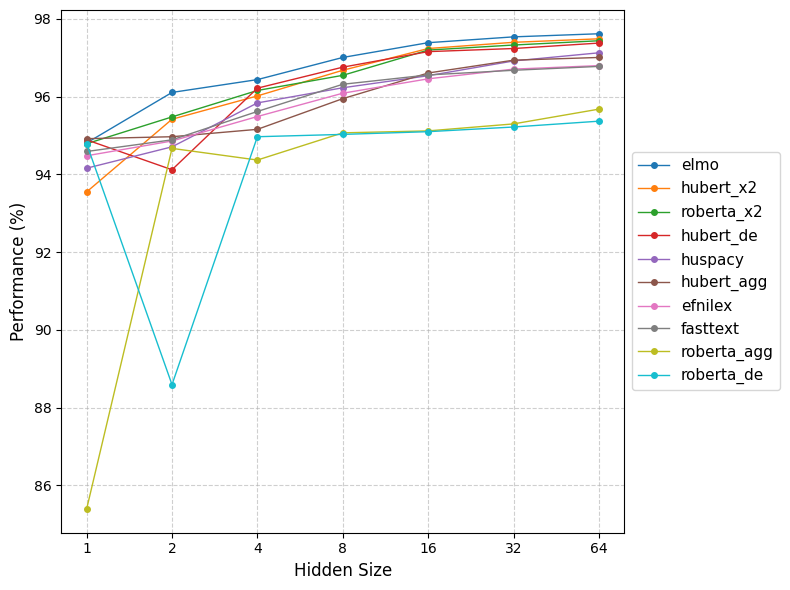

In [3]:
def plot_model_performance(df):
    """
    Plots model performance across different hidden sizes using a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame where index represents model names, columns represent hidden sizes,
                           and values represent performance scores.
    """
    plt.figure(figsize=(8, 6))

    # Plot each model's performance
    for model in df.index:

        plt.plot([str(item) for item in list(df.columns)], df.loc[model], marker='o', linestyle='-', label=model, linewidth=1, markersize=4)

    # Labels and title
    #plt.style.use('grayscale')
    plt.xlabel("Hidden Size", fontsize=12)
    plt.ylabel("Performance (%)", fontsize=12)
    #plt.title("Model Performance Across Hidden Sizes")
    plt.xticks([str(item) for item in list(ner_pivot_df.columns)])
    plt.legend(loc='center left', fontsize=11, bbox_to_anchor=(1, 0.5))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.savefig('ner_test.pdf')

    plt.show()

plot_model_performance(ner_pivot_df)

### POS

In [ ]:
# Folder containing the pickle files
folder_path = "../logs/pos/test"

# List to store data
data = []

# Iterate over each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".pkl"):
        model_name, _, hidden_size = file.rsplit("_", 2)
        hidden_size = int(hidden_size.split(".")[0])  # Extract the hidden size

        # Load the pickle file
        with open(os.path.join(folder_path, file), "rb") as f:
            lst = pickle.load(f)

        # Get the last element of the list
        last_element = lst * 100 #[-1] if lst else None

        # Append to data
        data.append([model_name, hidden_size, last_element])

# Create DataFrame
pos_df = pd.DataFrame(data, columns=["Model Name", "Hidden Size", "Last Element"])

pos_pivot_df = pos_df.pivot(index="Model Name", columns="Hidden Size", values="Last Element")

# Sorting columns for better readability
pos_pivot_df = pos_pivot_df.sort_index(axis=1, ascending=True)

# Display the result
pos_pivot_df = pos_pivot_df.sort_values(by=64, ascending=False)
pos_pivot_df

Hidden Size,1,2,4,8,16,32,64
Model Name,,,,,,,
elmo,45.692986,83.944356,88.302386,90.561861,93.001384,94.004935,94.576967
hubert_x2,60.402709,73.059964,84.586769,91.339749,92.503738,93.375486,93.945944
roberta_x2,40.888938,72.651124,87.378401,90.208560,92.362392,93.461823,93.755728
huspacy,51.195997,69.156867,83.094054,89.311218,91.258603,92.470288,93.325102
hubert_de,15.529402,72.690421,86.804813,88.861299,91.054475,92.981052,93.167847
efnilex,38.150832,67.109466,78.814745,85.917300,87.912160,89.381504,90.483660
fasttext,46.090803,69.459981,80.011278,86.087787,88.334417,89.474720,89.987874
hubert_agg,25.871989,48.991951,65.635264,76.759505,82.403994,85.603017,87.387586
roberta_de,32.187727,45.425838,54.204279,60.566378,67.954373,71.200824,78.366047


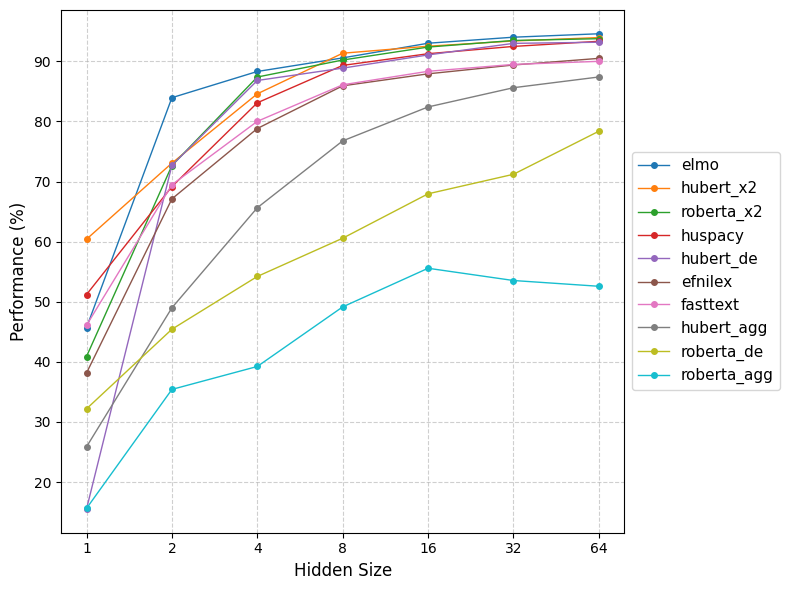

In [5]:
import matplotlib.pyplot as plt

def plot_model_performance(df):
    """
    Plots model performance across different hidden sizes using a given DataFrame.

    Args:
        df (pd.DataFrame): A DataFrame where index represents model names, columns represent hidden sizes,
                           and values represent performance scores.
    """
    plt.figure(figsize=(8, 6))

    # Plot each model's performance
    for model in df.index:

        plt.plot([str(item) for item in list(df.columns)], df.loc[model], marker='o', linestyle='-', label=model, linewidth=1, markersize=4)

    # Labels and title
    plt.xlabel("Hidden Size", fontsize=12)
    plt.ylabel("Performance (%)", fontsize=12)
    #plt.title("Model Performance Across Hidden Sizes")
    plt.xticks([str(item) for item in list(df.columns)])
    plt.legend(loc='center left', fontsize=11, bbox_to_anchor=(1, 0.5))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('pos_test.pdf')

    plt.show()

plot_model_performance(pos_pivot_df)